# Hypothesis Testing Workshop

## 11 November 2022

### Hosted by and maintained by [SAAS](https://saas.berkeley.edu).
Created by Suparna Kompali, Carlos Gonzalez

**Recommended Reading**: 

* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

In [ ]:
# Run this cell to set up the notebook

# These lines import the Numpy and Datascience modules.
import numpy as np
import pandas as pd
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Setup

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions. We may also refer to an A/B test as a permutation test. See the resources above for a more formal introduction to A/B tests.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step. Oftentimes, we use an A/B test to determine whether or not two samples came from the same underlying distribution.

Before we can perform an A/B test and moving forward, we'll need to do some setting up with our dataframe.

**Question 1:** Now, let's go ahead and read in the ```ab_data.csv``` data. Store it in ```ab```.

In [ ]:
ab = ...
ab.head()

**Question 2:** What is the granularity of this dataframe?

Use the cell below to observe the shape of the dataframe.

In [ ]:
ab.shape

The line below will show us the number of unique rows

In [ ]:
ab.duplicated().sum()

In [ ]:
ab.info()

**Question 3:** In the cell below, assign ```count``` to a table with the sum of the control and treatment group, respectively. 

As a hint, you may use the *to_frame()* function to convert a series object to a Pandas DataFrame.

In [ ]:
count = ...
count

**Question 4:** In the cell below, assign ```ab_proportions``` to a table with the proportion of converted and non-converted inputs, respectively.

In [ ]:
ab_proportions = ...
ab_proportions

Let's observe the number of instances *new_page* occurs:

In [ ]:
ab.loc[ab["landing_page"]=='new_page']

Let's also observe the number of unique inputs given the ```group``` and ```landing_page``` columns:

In [ ]:
ab_landing_page = ab.groupby(["landing_page","group"],as_index= False).size()
ab_landing_page

As a final note, we will now create a subframe which will concatenate rows 1 and 2 in ```ab_landing_page```. We will be using this new dataframe, ```ab2``` in our A/B Testing.

In [ ]:
#Just run this cell

ab2= pd.concat([ab.loc[(ab["landing_page"]== "old_page") &(ab["group"]=="control")], ab.loc[(ab["landing_page"]== "new_page") &(ab["group"]=="treatment")]] , axis=0)
ab2

Note: You don't have to worry about how we derive the DataFrame above. Make sure you use ```ab2``` instead of ```ab``` in the following exercises.

## 2. A/B Testing

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? How long do you run to render a decision that neither page is better than another?

These questions are the difficult parts associated with A/B tests in general.

**Question 5:** For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of $p_{old}, p_{new}$ which are the converted rates for the old and new pages.

_Null Hypothesis $H_0$:_ ...

_Alternative Hypothesis $H_1$:_ ...

**Question 6:** Assume under the null hypothesis,  $p_{old}$ and $p_{new}$  both have "true" success rates equal to the converted success rate regardless of page - that is,  $p_{old}$ and $p_{new}$  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.

This is going to be setup for our A/B samples, so don't worry too much about how we derive the following:

Under the null and given from qutesion 6, we will assume $p_{old} = p_{new}$. Calculate $p_{new}$, the _average_ conversion rate under the null. Your answer should be around 11%.

In [ ]:
conversion = ...
conversion

We are now going to simulate the number of individuals in the treatment group with a conversion rate of ```conversion``` under the null.

In [ ]:
#Just run this cell
num_treatment = len(ab2[ab2["group"]== "treatment"])

new_page_converted =np.random.binomial(1, conversion, num_treatment) 
new_page_converted.mean()

We will do the same this as above. We are now going to simulate the number of individuals in the control group with a conversion rate of conversion under the null.

In [ ]:
#Just run this cell
num_control = len(ab2[ab2["group"]== "control"])

old_page_converted =np.random.binomial(1, conversion, num_control) 
old_page_converted.mean()

The code above is setting up to calculate a potential test statistic. In the Markdown cell below, write down a test statistic you believe will suffice in proving or disproving the null hypothesis.

As a hint, think about what we can do with the mean values.

Test Statistic: $p_{new} - p_{old}$. If we observe negative values then this is in support of the Null Hypothesis.

**Question 7:** Now, run 10,000 simulations using the test statistic above. Store all 10,000 values in a NumPy array called p_diffs. This cell will take a minute to fully load.

In [ ]:
p_diff = []
for i in range (10000):
    new_page_converted = np.random.binomial(1, conversion, num_treatment) 
    old_page_converted = np.random.binomial(1, conversion, num_control) 
    ...

**Question 8:** Plot a histogram of the ```p_diffs```. Does this plot look like what you expected?


In [ ]:
p_diff= np.array(p_diff)

plt.hist(p_diff)

**Question 9:** Assign ```diff_mean``` to the result of taking the mean differences of the treatment and control groups that were marked converted  in the ```ab2``` dataframe.

In [ ]:
ab2_converted_treatment = ab2.converted.loc[( ab2["group"] == "treatment")]
ab2_converted_control = ab2.converted.loc[( ab2["group"] == "control")]
diff_mean = ...
diff_mean

Once question 9 is filled out, run the cell below.

In [ ]:
plt.hist(p_diff)
plt.axvline(diff_mean, color='r', label="observed difference")

Let us now calculate the proportion of ```p_diff``` values which are greater than the actual observed differences in the given dataset.

In [ ]:
p_diff_Series = pd.Series(p_diff)
(p_diff_Series >  diff_mean).mean()

We discussed during the workshop about the p-value and it's significance in A/B Testing. In your own words, explain what your value means in this test. What does this value mean in terms of whether or not there is a difference between the new and old pages?

...

**Great job!** We've performed a basic A/B Test to determine statistical significance between the control and treatment groups of the listed dataframe.

As per the slideshow presentation, the *p-value* approach involves determining "likely" or "unlikely" cases by determining the probability—assuming the null hypothesis were true—of observing a more extreme test statistic in the direction of the alternative hypothesis. If the *p-value* is small, say less than or equal to $\alpha$, then it is "unlikely". Otherwise, it is "likely". 

In other words, if the *p-value* is less than (or equal to) $\alpha$, then the null hypothesis is rejected in favor of the alternative hypothesis. Otherwise, the null hypothesis is not rejected. 

## 3. Mean GPA

In our example concerning GPA, suppose that our random sample of *n = 15* students majoring in Data Science yields an arbitrary test statistic, which is obscured in this example. Also, suppose we set our level of significance to *$\alpha$ = 0.05*, so that we only allow a 5% chance of making an error in our findings.

**Right Tailed Test**

The *p-value* for conducting a Right Tailed Test is the probability we would observe a test statistic greater than what we calculate (in this case, this value is abstracted). Think of the probability of an event happening as the area under the bell curve.

From this particular example, say we use statistical software which depicts the graph below, with a *p-value* being 0.0127:

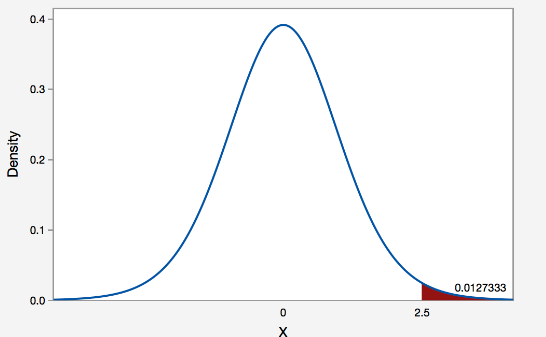

**Question 10:** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about the association between the 15 students's GPA?

...

Congratulations! You've completed this Notebook.